<a href="https://colab.research.google.com/github/Saif-Khan435/Retail-Sales-Prediction/blob/main/Mohammed_Saif_Khan_M4W3_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Steps To Follow :

1) Loading Libraries

2) Loading Dataset

3)Data Exploration

4) Data Cleaning and Preparation
*  Data Cleaning
*  Data Merging
*  Data Preparation

5) Exploratory Data Analysis
* Indepent Vs dependent variables
* Hypotheisis Testing 

6) Feature Engineering
* Feature Encoding 

7) Modelling
* Linear Regression Model
* Decision Tree Regression Model 
* Random Forest Regression Model 
* Hyperparameter Tunning
* Model Metrics Dataset
* Feature Importance

8) Conclusion

# Loading Libraries :

In [9]:
# Libraries for Basic Operations on Dataset and Plotting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We will be using the Numpy library for numerical operations and Pandas library for data analysis. We also have matplotlib and seaborn libraries that will be used for plotting. %matplotlib inline is to display the plots inside the notebook.

In [10]:
# Librarires for Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

From the sklearn library we have imported train_test_split that is used to divide the dataset into two groups i.e. train set and test set. We also have imported MinMaxScaler that is used to transform the features and finally we have imported LinearRegression which will be for Linear Regression Modelling.

In [11]:
# Libraries for Checking Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

From the sklearn library we have imported mean_square_error, mean_absolute_error, mean_absolute_percentage_error and r2_score to find the metrics for each model.

In [12]:
# Libraries for Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

From the sklearn library we have imported the DecisionTreeRegressor to perform Decision Tree Regression.

In [13]:
# Library for Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

From the sklearn library we have imported the RandomForestRegressor to perform Random Forest Regression.

In [14]:
# Library for Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

From the sklearn library we have imported RandomizedSearchCV to perform cross-validation.

In [15]:
# Library for Ignoring warnings

import warnings
warnings.filterwarnings('ignore')

We have imported the warnings library to ignore the warnings that promopted at runtime.

In [16]:
# Setting Parameters for the plots

plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

Here we are setting the parameters for the plots before start the plotting.

# Loading Datasets :

In [17]:
# Mounting the google drive to google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We import drive from google library to mount the google drive to the google colab.

In [18]:
# Loading the first dataset

sales_df = pd.read_csv('/content/drive/MyDrive/Alma Better Pinnacle Pro/Module 4 - Capstone Projects/Regression Capstone Project/Retail Sales Prediction/Copy of Rossmann Stores Data.csv',parse_dates=['Date'])

We are loading the first dataset i.e. the sales dataset which is the Rossmann Stores Data as `sales_df`.

In [19]:
# Loading the second dataset

store_df = pd.read_csv('/content/drive/MyDrive/Alma Better Pinnacle Pro/Module 4 - Capstone Projects//Regression Capstone Project/Retail Sales Prediction/Copy of store.csv')

We are loading the second dataset i.e. the store dataset which is the Stores as `store_df`.

# Data Exploration :

In [20]:
# Check shape of the first dataset

sales_df.shape

(1017209, 9)

The shape of the `sales_df` is 1017209 rows and 9 columns.

In [21]:
# Check columns of the first dataset

sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

The columns of the `sales_df` are `Store`,`DayOfWeek`,`Date`,`Sales`,`Customers`,`Open`,`Promo`,`StateHoliday`,`SchoolHoliday`.

In [22]:
# Check the first 5 rows of the dataset

sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


This shows the first 5 rows of the `sales_df` which helps us understand the data we have in each row.

In [23]:
# Check the last 5 rows of the dataset

sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


This shows the last 5 rows of the `sales_df` which helps us understand the data we have in each row.

In [24]:
# Check basic infomation about the dataset

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Here we can see that the `sales_df` has in total 9 columns and the datatypes for those columns are 1 datetime, 7 int and 1 object type.

In [25]:
# Check shape of the second dataset

store_df.shape

(1115, 10)

The shape of the `store_df` is 1115 rows and 10 columns.

In [26]:
# Check columns of the second dataset

store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

The columns of the `store_df` are `Store`,`StoreType`,`Assortment`,`CompetitionDistance`,`CompetitionOpenSinceMonth`,`CompetitionOpenSinceYear`,`Promo2`,`Promo2SinceWeek`,`Promo2SinceYear`,`PromoInterval`.

In [27]:
# Check the first 5 rows of the dataset

store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


This shows the first 5 rows of the `store_df` which helps us understand the data we have in each row.

In [28]:
# Check the last 5 rows of the dataset

store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


This shows the last 5 rows of the `store_df` which helps us understand the data we have in each row.

In [29]:
# Check basic infomation about the dataset

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Here we can see that the `store_df` has in total 10 columns and the datatypes for those columns are 5 float, 2 int and 3 object type.

# Data Cleaning And Preparation :

## Data Cleaning :

In [30]:
# Check total null values in first dataset

sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As we can see there are no null values in the `sales_df`.

In [31]:
# Check total null values in second dataset

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In the `store_df` we can see that there are
* 3 NaN values in `CompetitionDistance`
* 354 NaN values in `CompetitionOpenSinceMonth` and `CompetitionOpenSinceWeek`
* 544 NaN values in `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval`.

We have to check the percentage of null values in each column.

In [32]:
# Check percentage of null values in CompetitionDistance column

print(f"Percentage of Null Values : {(store_df.CompetitionDistance.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 0.26905829596412556 %


We found that there are 0.26% of NaN values in the `CompetitionDistance` column. The percentage mentioned above is small so we have to look into the data.

In [33]:
# Check rows with null values in CompetitionDistance column

store_df[store_df.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


When we looked into the data, we found that the other columns had proper data present in the them so we have decided to replace the data insteaded of removing it. 

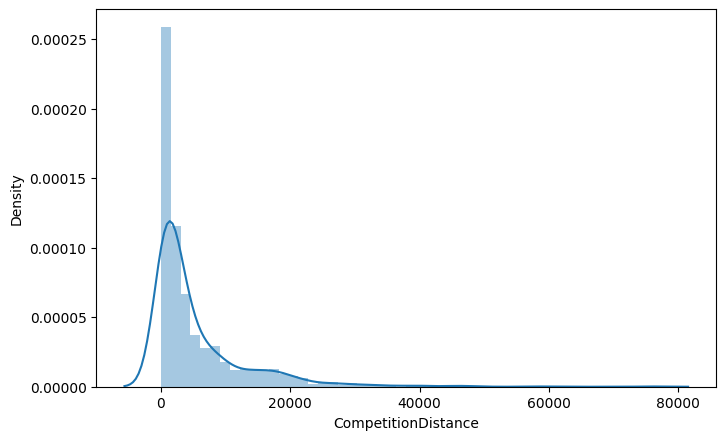

In [34]:
sns.distplot(store_df.CompetitionDistance)

Since the plot is positively skewed so we will use the medain to replace the NaN values in the `CompetitionDistance` column.

In [35]:
# Replacing the null values with meadian in the CompetitionDistance column

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(),inplace=True)

We use fillna() to replace the NaN values with the medain values of the `CompetitionDistance` column.

In [36]:
# Check percentage of null values in CompetitionOpenSinceMonth column

print(f"Percentage of Null Values : {(store_df.CompetitionOpenSinceMonth.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


We found that there are 31.74% of NaN values in the `CompetitionOpenSinceMonth` column. The percentage mentioned above is big so we have to remove this column as approximately 1/3 of the column has null values and replacing those values would effect the final prediction.

In [37]:
# Check percentage of null values in CompetitionOpenSinceYear column

print(f"Percentage of Null Values : {(store_df.CompetitionOpenSinceYear.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


We found that there are 31.74% of NaN values in the `CompetitionOpenSinceYear` column. The percentage mentioned above is big so we have to remove this column as approximately 1/3 of the column has null values and replacing those values would effect the final prediction.

In [38]:
# Check percentage of null values in Promo2SinceWeek column

print(f"Percentage of Null Values : {(store_df.Promo2SinceWeek.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `Promo2SinceWeek` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [39]:
# Check percentage of null values in Promo2SinceYear column

print(f"Percentage of Null Values : {(store_df.Promo2SinceYear.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `Promo2SinceYear` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [40]:
# Check percentage of null values in PromoInterval column

print(f"Percentage of Null Values : {(store_df.PromoInterval.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `PromoInterval` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [41]:
# Removing the columns with higher percentage of null values

store_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

So, we use the drop() to drop the column from `store_df` that have higher percentage of null values i.e. `CompetitionOpenSinceMonth`, `CompetitionOpenSinceWeek`,
 `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval`.

Now, we don't have any null values or missing values in both the datasets so we can go to the merging step.

## Data Merging :

In [42]:
# Merge the two datasets

store_sales_df = pd.merge(sales_df,store_df,how='left',on='Store')

We left join the `sales_df` and `store_df` to `store_sales_df` using the merge() on the `Store` column.

In [43]:
# Check shape of the dataset

store_sales_df.shape

(1017209, 13)

The shape of the `store_sales_df` is 1017209 rows and 13 columns.

In [44]:
# Check the first 5 rows of the dataset

store_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


This shows the first 5 rows of the `store_sales_df` which helps us understand the data we have in each row.

In [45]:
# Check the last 5 rows of the dataset

store_sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,1


This shows the last 5 rows of the `store_sales_df` which helps us understand the data we have in each row.

In [46]:
# Check total null values in the dataset

store_sales_df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

As we can see there are no null values in the `store_sales_df`.

In [47]:
# Check basic infomation about the dataset

store_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
dt

Here we can see that the `store_sales_df` has in total 13 columns and the datatypes for those columns are 1 datetime, 1 float, 8 int and 3 object type.

In [48]:
# Check descriptive stats for the dataset

store_sales_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422021e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706918e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,0.000000e+00


After doing the descriptive statistical analysis we know the mean, std, quartile ranges, min and max values for the columns in `store_sales_df`.

## Data Preparation :

In [49]:
store_sales_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

While checking the data in `store_sales_df` we found that `StateHoliday` had both number and string type values so to remove any kind of misunderstanding we will change the values to the same datatype.

In [50]:
# Changing datatype of the StateHoliday values

store_sales_df.StateHoliday = store_sales_df.StateHoliday.apply(str)

The apply() will change the datatype of all the numeric values to string type.

In [51]:
store_sales_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

As we can see all the values in the `StateHoliday` column are of string type.

# Exploratory Data Analysis :

In Exploratory Data Analysis, first of all we are going to come up with some hypothesis to test and derive some insights and conclusions from the data.

The Hypothesis that we are going to test are :-

* Stores should sell more over the years.
* Stores should sell less on weekends.
* Stores with closer competitors should sell less.
* Store type with a larger assortment of products should sell more.
* Number of Customers should have a positive correlation with Sales.
* Stores with promotion should have high Sales.

Before we start with Hypothesis Testing we have to plot some plots between the Independent and Dependent variables.

## Independent Vs Dependent Variables :

1. **Sales Vs Store :** 

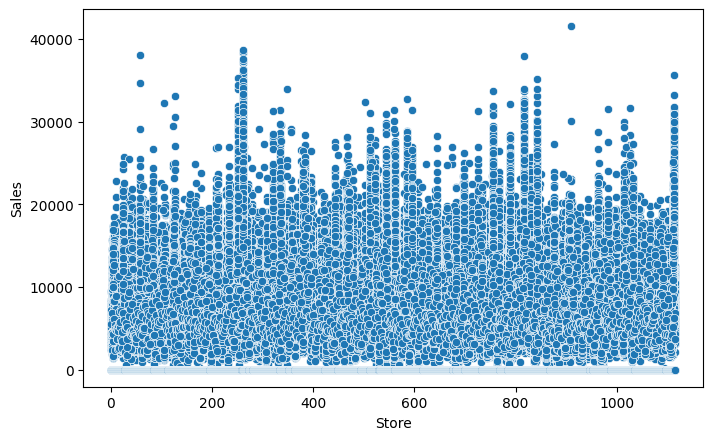

In [52]:
# Scatterplot for Store and Sales column

sns.scatterplot(store_sales_df.Store,store_sales_df.Sales)

* The `Sales` for most of the `Stores` is below 20000.

2. **Sales Vs DayOfWeek :**

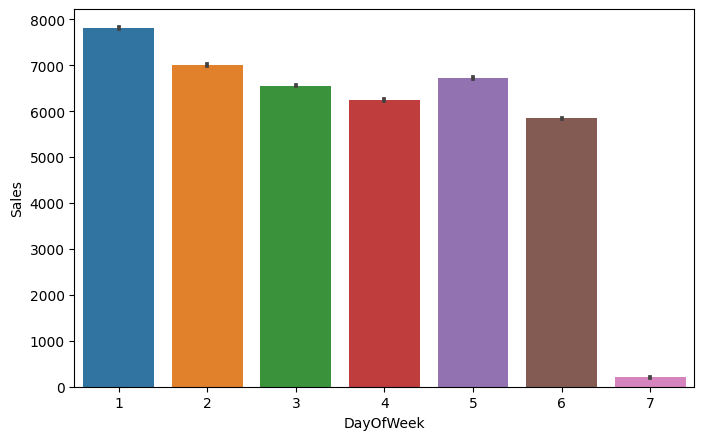

In [53]:
# Barplot for DayOfWeek and Sales column

sns.barplot(store_sales_df.DayOfWeek,store_sales_df.Sales)

* From the above plot we can say that `Sales` is highest on Monday's.


3. **Sales Vs Customer :**

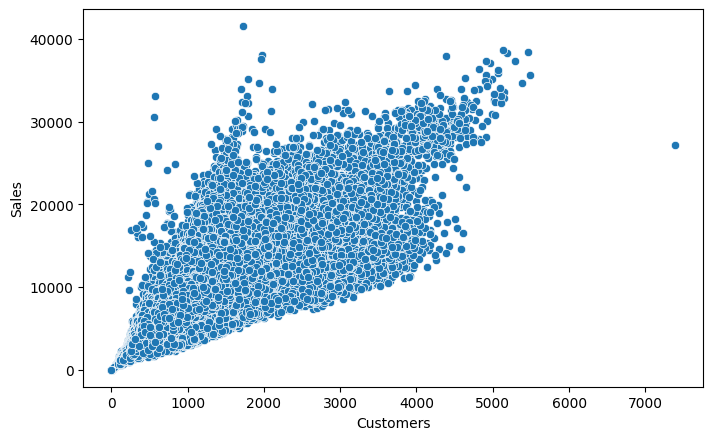

In [54]:
# Scatterplot for Customers and Sales column

sns.scatterplot(store_sales_df.Customers,store_sales_df.Sales)

* There is a Linear relation between `Sales` and `Customers`.

4. **Sales Vs Month :**

Text(0.5, 0, 'Month')

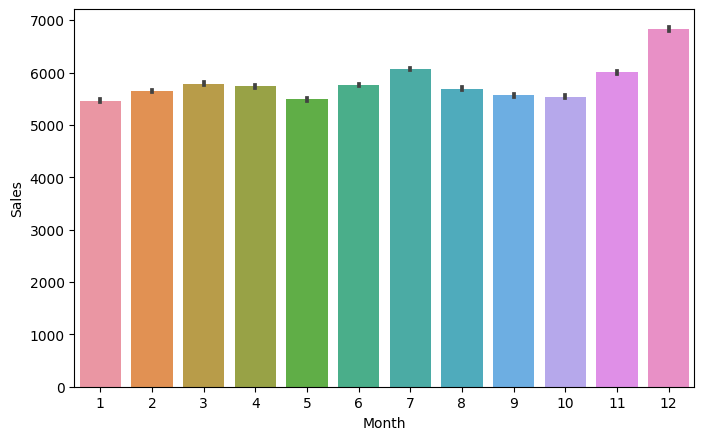

In [55]:
# Barplot for Month and Sales column

sns.barplot(store_sales_df.Date.dt.month,store_sales_df.Sales)
plt.xlabel('Month')

* `Sales` are highest in December because of christmas holidays.

5. **Sales Vs Open :**

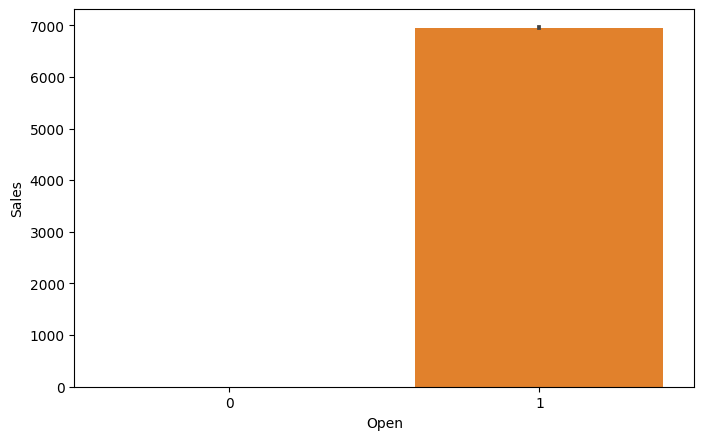

In [56]:
# Barplot for Open and Sales column

sns.barplot(store_sales_df.Open,store_sales_df.Sales)

* There is no sales when the stores were closed.

6. **Sales Vs Promo :**

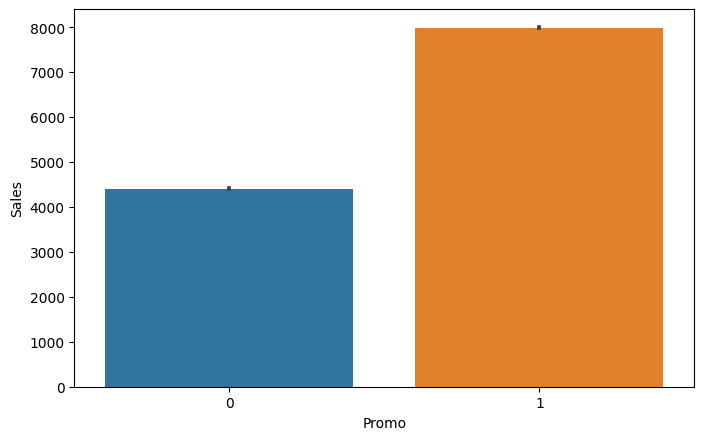

In [57]:
# Barplot for Promo and Sales column

sns.barplot(store_sales_df.Promo,store_sales_df.Sales)

* The `Stores` with promotion has higher `Sales`.

7. **Sales Vs StateHoliday :**

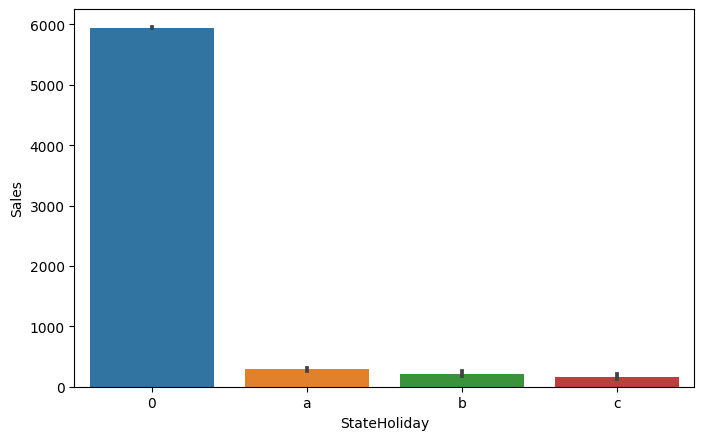

In [58]:
# Barplot for StateHoliday and Sales column

sns.barplot(store_sales_df.StateHoliday,store_sales_df.Sales)

* `Sales ` were the most when there was no State Holiday.

8. **Sales Vs SchoolHoliday :**

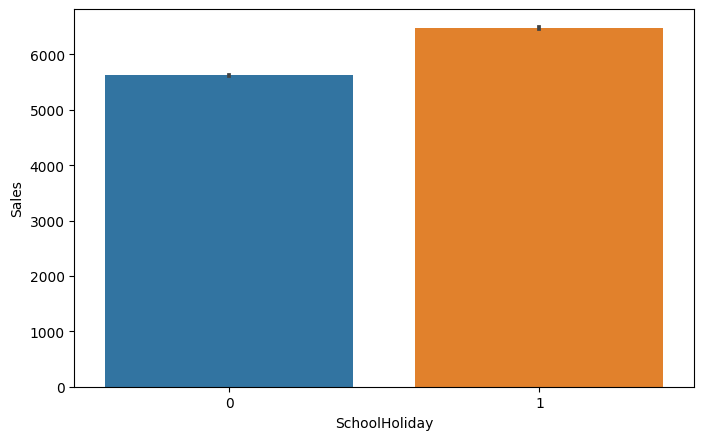

In [59]:
# Barplot for SchoolHoliday and Sales column

sns.barplot(store_sales_df.SchoolHoliday,store_sales_df.Sales)

* The `Sales` are more when there is `SchoolHolidays`.

9. **Sales Vs StoreType :**

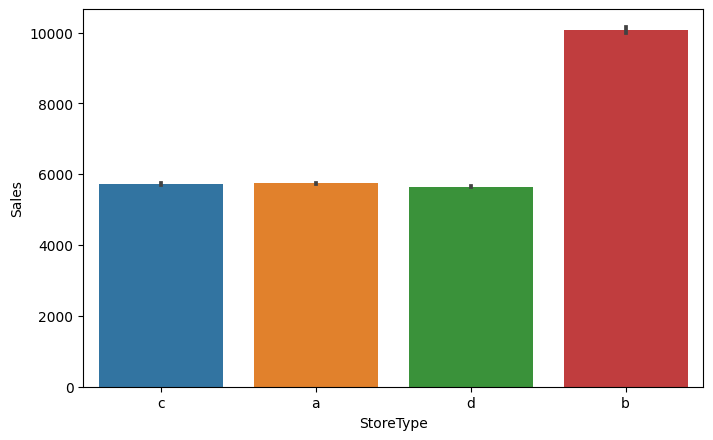

In [60]:
# Barplot for StoreType and Sales column

sns.barplot(store_sales_df.StoreType,store_sales_df.Sales)

* `StoreType` b has the most `Sales`.

10. **Sales Vs Assortment :**

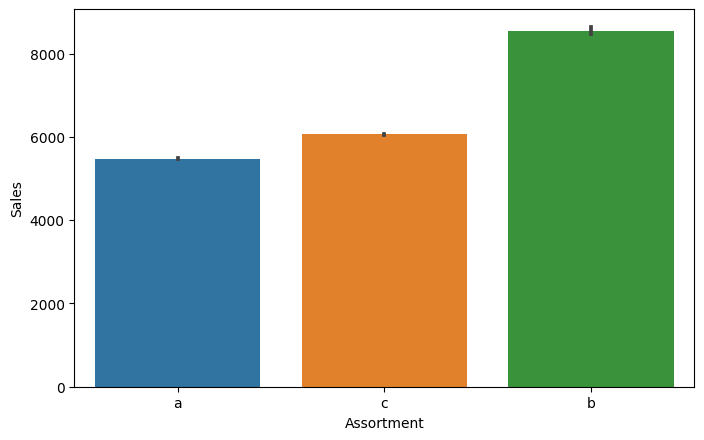

In [61]:
# Barplot for Assortment and Sales column

sns.barplot(store_sales_df.Assortment,store_sales_df.Sales)

* The `Stores` with `Assortment` b has the most number of sales.

11. **Sales Vs CompetitionDistance :**

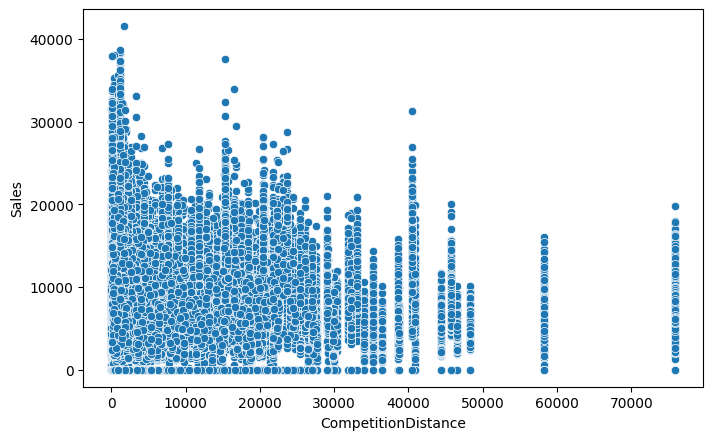

In [62]:
# Scatterplot for CompetitionDistance and Sales column

sns.scatterplot(store_sales_df.CompetitionDistance,store_sales_df.Sales)

* The `Stores`that have the least `CompetitionDistance` have higher `Sales`.

12. **Sales Vs Promo2 :**

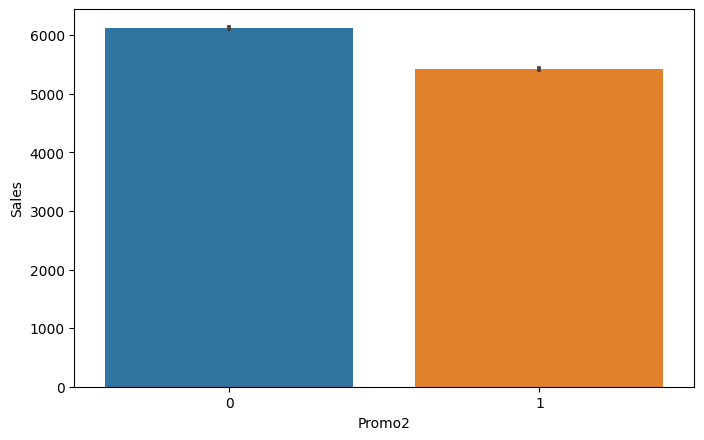

In [63]:
# Barplot for Promo2 and Sales column

sns.barplot(store_sales_df.Promo2,store_sales_df.Sales)

* Store sales are not affected by longterm promotion.

13. **Correlation Heatmap :**

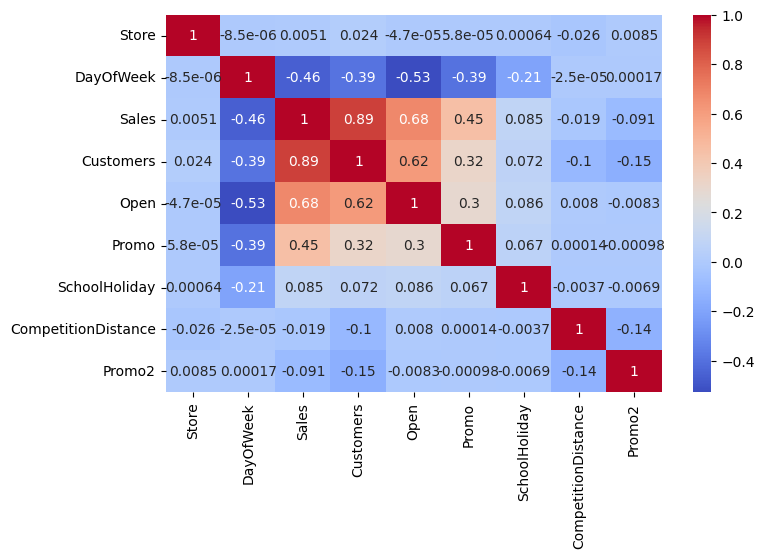

In [64]:
# Correlation Heatmap

sns.heatmap(store_sales_df.corr(),cmap='coolwarm',annot=True)

* `Sales` column shows strong positive correlation with `Customers` and `Open` columns.
* `Sales` column shows moderate positive correlation with `Promo` column.
* `Sales` and `DayOfWeek` shows moderate negative correlation.

Now we move to the next step i.e. Hypothesis Testing where we will test the above mentioned Hypothesis.

## Hypothesis Testing :

H1: **Stores should sell more over the years :**

Text(0.5, 0, 'Month')

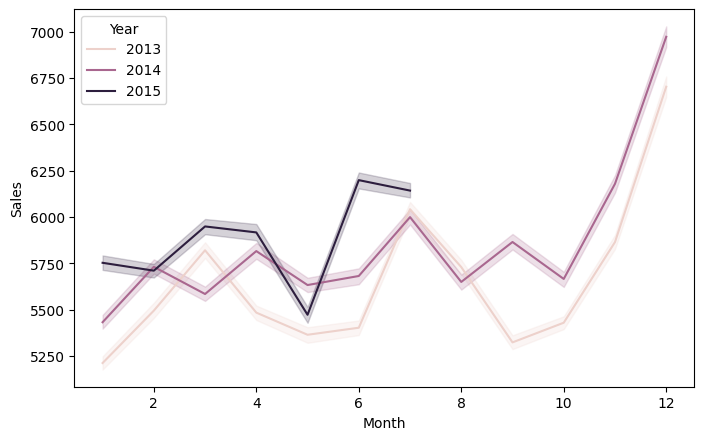

In [65]:
# Lineplot for Month and Sales column and hue as Year column

sns.lineplot(store_sales_df.Date.dt.month,store_sales_df.Sales,hue=store_sales_df.Date.dt.year)
plt.legend(title='Year')
plt.xlabel('Month')

From the plot we can see an increase in Sales over the years. Hence, the Hypothesis is true.

H2: **Stores should sell less on weekends :**

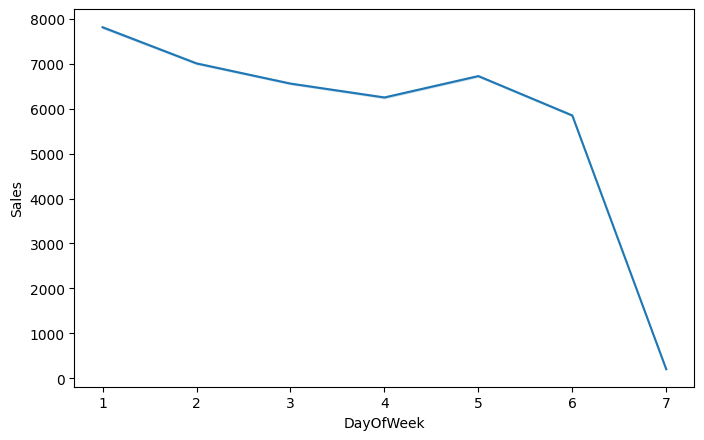

In [66]:
# Lineplot for DayOfWeek and Sales column

sns.lineplot(store_sales_df.DayOfWeek,store_sales_df.Sales)

From the plot we can see there is gradual decrease in the `Sales` over the week and the `Sales` is the lowest for the weekend.Hence,the Hypothesis is True.

H3: **Stores with closer competitors should sell less :**

In [67]:
# Grouping Store, Sales and CompetitionDistance column using groupby function

plot_df = store_sales_df.groupby(['Store'])[['Sales','CompetitionDistance']].agg({'Sales':'sum','CompetitionDistance':'mean'}).sort_values('CompetitionDistance')
plot_df

,Sales,CompetitionDistance
Store,,
516,4579807,20.0
882,5081054,30.0
1008,4179585,30.0
621,4608739,30.0
988,3683288,30.0
...,...,...
747,6261174,45740.0
110,3554993,46590.0
801,3798660,48330.0


Using groupby function to group `Stores` based on `Sales` and `CompetitionDistance`.

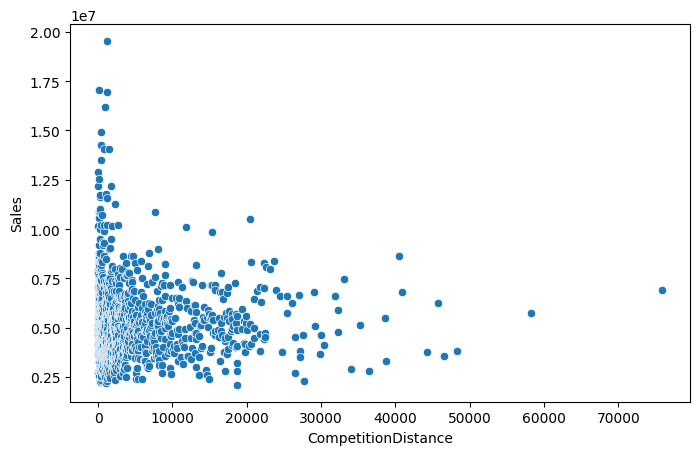

In [68]:
# Scatterplot for CompetitionDistance and Sales column

sns.scatterplot(plot_df.CompetitionDistance,plot_df.Sales)


From the plot we can deduce `Stores`with closer competition have the higher `Sales`. Hence ,the Hypothesis is false.

H4: **Store type with a larger assortment of products should sell more :**

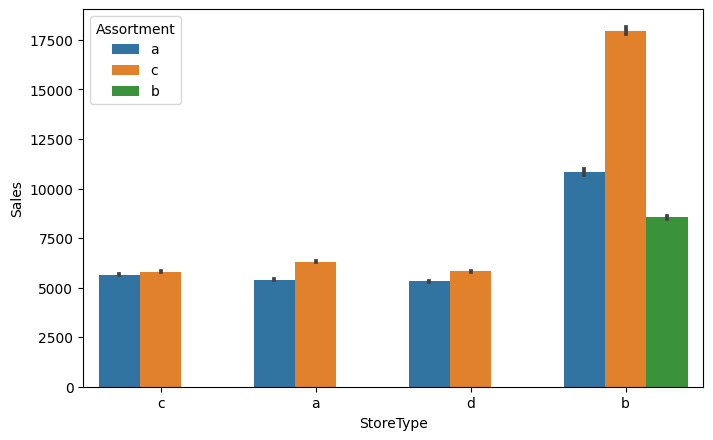

In [69]:
# Barplot for StoreType and Sales column and hue as Assortment column

sns.barplot(store_sales_df.StoreType,store_sales_df.Sales,hue=store_sales_df.Assortment)

* `StoreType`b has all the three types of assortments , thus the sales are highest.Hence , the Hypothesis is true.

H5: **Number of Customers should have a positive correlation with Sales :**

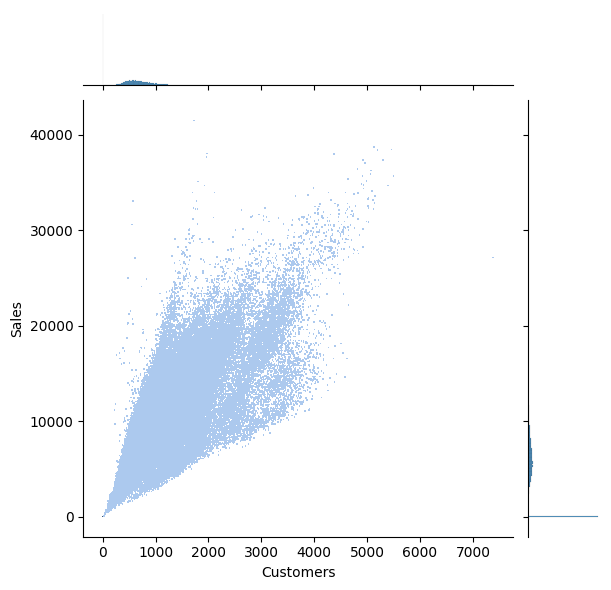

In [70]:
# Jointplot for Customers and Sales column

sns.jointplot(store_sales_df.Customers,store_sales_df.Sales,kind='hist')

From the above plot we can see that `Sales` has linear relation with number of `Customers`.Hence , the Hypothesis is true.

H6: **Stores with promotion should have high Sales :**

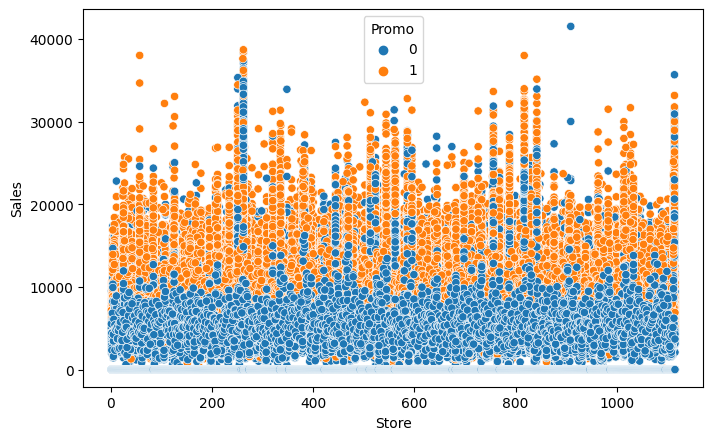

In [71]:
# Scatterplot for Store and Sales column and hue as Promo column

sns.scatterplot(store_sales_df.Store,store_sales_df.Sales,hue=store_sales_df.Promo)

From the above plot we can see that `Stores` with promotion usually have higher Sales.Hence , the Hypothesis is true.

# Feature Engineering :

In [72]:
# Removing rows where Stores was closed (Open == 0)

store_sales_df.drop(store_sales_df.index[store_sales_df.Open==0],inplace=True)

Here we removed the rows where the `Open` column was 0 as Sales can only be done when the stores are open.

In [73]:
# Removing rows where Stores was open but Sales was 0 (Open == 1 & Sales == 0)

store_sales_df.drop(store_sales_df.index[(store_sales_df.Sales == 0) & (store_sales_df.Open == 1)],inplace=True)

We also removed the rows where the `Sales` column was 0 and the `Open` column was 1 as there were no sales even when the stores were open. Hence, they do not affect the sales so removing them would not affect the prediction.

In [74]:
# Remove the Open column

store_sales_df.drop('Open',inplace=True,axis=1)

We removed the `Open` column itself as it had only one unique value i.e. 1 so it was no more needed.

## Feature Encoding :

Here we will be label encoding and one hot encoding columns as per required.

In [75]:
# Create a copy of the Dataframe

new_df = store_sales_df.copy()

We created a copy of the `store_sales_df` so that we can use this for the further steps and if any issue occurs the main dataset is not harmed. 

In [76]:
# Replacing the values string 0 with numberic 0 and string a,b,c with numeric 1

new_df.StateHoliday.replace({'0':0,'a':1,'b':1,'c':1},inplace=True)

Here we label encoded the values in the `StateHoliday` column to appropriate labels.

In [77]:
# Creating a new column Competition

new_df['Competition'] = new_df['CompetitionDistance'].apply(lambda x: 1 if x <= 5000 else 0)

Here we label encoded the values in the `CompetitionDistance` column to appropriate labels.

In [78]:
# Create a new column WeekNumber

new_df['WeekNumber'] = new_df.Date.dt.weekofyear

Since we will be removing the `Date` column from the `new_df` we added a new column `WeekNumber` so that we have a date related column with us as this dataset is a time series dataset.

In [79]:
# Creating dummy variables

dummy_columns = pd.get_dummies(new_df[['StoreType','Assortment']])

Here we one hot encoded the values in the `StoreType`, `Assortment` columns to appropriate dummy columns.

In [80]:
# Joining the dataframe and the dummy columns

new_df = new_df.join(dummy_columns)

Here we join the `dummy_columns` and the `new_df` together using the join().

In [81]:
# Removing unnecessary columns

new_df.drop(['Date', 'StoreType', 'Assortment', 'CompetitionDistance'], axis = 1, inplace = True)

Here we will removed the columns that would not needed in the modelling phase.

In [82]:
# Inspecting the changed dataframe

new_df

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Promo2,Competition,WeekNumber,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,5263,555,1,0,1,0,1,31,0,0,1,0,1,0,0
1,2,5,6064,625,1,0,1,1,1,31,1,0,0,0,1,0,0
2,3,5,8314,821,1,0,1,1,0,31,1,0,0,0,1,0,0
3,4,5,13995,1498,1,0,1,0,1,31,0,0,1,0,0,0,1
4,5,5,4822,559,1,0,1,0,0,31,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,3375,566,0,1,1,0,1,1,0,1,0,0,1,0,0
1016827,733,2,10765,2377,0,1,1,0,1,1,0,1,0,0,0,1,0
1016863,769,2,5035,1248,0,1,1,1,1,1,0,1,0,0,0,1,0
1017042,948,2,4491,1039,0,1,1,0,1,1,0,1,0,0,0,1,0


We can see the `new_df` after label encoding and one hot encoding.

In [83]:
# Rearranging columns in the dataframe

cols = list(new_df.columns.values)
cols = cols[0:2] + cols[3:17] + cols[2:3]
new_df = new_df[cols]

We rearranged the `new_df` in such a way that the dependent variable i.e. `Sales` column is at the end of the dataframe.

In [84]:
# Inspecting the rearranged dataframe

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store          844338 non-null  int64
 1   DayOfWeek      844338 non-null  int64
 2   Customers      844338 non-null  int64
 3   Promo          844338 non-null  int64
 4   StateHoliday   844338 non-null  int64
 5   SchoolHoliday  844338 non-null  int64
 6   Promo2         844338 non-null  int64
 7   Competition    844338 non-null  int64
 8   WeekNumber     844338 non-null  int64
 9   StoreType_a    844338 non-null  uint8
 10  StoreType_b    844338 non-null  uint8
 11  StoreType_c    844338 non-null  uint8
 12  StoreType_d    844338 non-null  uint8
 13  Assortment_a   844338 non-null  uint8
 14  Assortment_b   844338 non-null  uint8
 15  Assortment_c   844338 non-null  uint8
 16  Sales          844338 non-null  int64
dtypes: int64(10), uint8(7)
memory usage: 108.7 MB


Finally, we have completed the Feature Engineering part and now we can begin with Modelling.

# Modelling :

## Linear Regression Model :

In [85]:
# Initializing x and y

X = new_df.drop('Sales',axis=1)
y = new_df.Sales

We hace initialized `X` and `y` where `X` has all the dependent variables and `y` has all the independent variables.

In [86]:
# Splitting the dataset into train set and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Here we split the dataset into two i.e. train set and test set which will be used for prediction and the percentage of test set is 20% and the rest is train set.

In [87]:
# Scaling the train and test dataset

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here we have created an instance of the MinMaxScaler class and then transformed the data through scaling.

In [88]:
# Creating an instance of the LinearRegression class and transforming the train and test dataset

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Here we have created an instance of the LinearRegression class and then transformed this data and model a target prediction value based on independent variables.

In [89]:
# Inspecting the intercept

regressor.intercept_

-1078.3686925693855

The intercept for the model comes is -1078.36.

In [90]:
# Inspecting the coefficient

regressor.coef_

array([-1.34801728e+02, -2.42854299e+02,  5.46340241e+04,  1.13911132e+03,
        2.84070284e+02,  3.94628254e+01,  2.83157988e+02, -5.19600856e+02,
        2.62694382e+02,  5.84091123e+02, -2.68060552e+03,  4.53477783e+02,
        1.64303662e+03,  1.27239173e+03, -2.83791535e+03,  1.56552361e+03])

The coefficients for the model are between -2387.91 to 54634.02.

In [91]:
# Predicting the values from train dataset

y_pred_train = regressor.predict(X_train)

Here we used the LinearRegression class to predict values for the independent values that are present in the train set i.e. `X_train`.

In [92]:
y_pred_train

array([ 6827.01549118, 13570.70077335,  9636.33533746, ...,
        1652.77734747,  3621.33492434,  4055.05790151])

These values are the predicted values from the Linear Regression Model for the independent varaibles that are present in the train set.

In [93]:
# Predicting the values from test dataset

y_pred = regressor.predict(X_test)

Here we used the LinearRegression class to predict values for the independent values that are present in the test set i.e. `X_test`.

In [94]:
y_pred

array([4436.76639582, 3348.48764331, 6313.49809748, ..., 5886.25008802,
       4360.7787244 , 4737.85977291])

These values are the predicted values from the Linear Regression Model for the independent varaibles that are present in the test set.

In [95]:
# Function to print the metrics for the model

def model_metrics( model_name, y_train, y_pred_train, y_test, y_pred_test,):
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    rmse_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
    R2_Score_train = r2_score(y_train, y_pred_train)
    Adj_r2_train = 1 - (1-r2_score(y_train, y_pred_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    rmse_test = np.sqrt( mean_squared_error(y_test, y_pred_test) )
    R2_Score_test = r2_score(y_test, y_pred_test)
    Adj_r2_test = 1 - (1-r2_score(y_test, y_pred_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    return pd.DataFrame({'Model Name': model_name,'MAE Train': mae_train, 'MAE Test': mae_test,'MAPE Train': mape_train,'MAPE Test': mape_test,'RMSE Train': rmse_train,'RMSE Test': rmse_test,'R2_Score Train':R2_Score_train, 'R2_Score Test':R2_Score_test,'Adj_r2 Train':Adj_r2_train, 'Adj_r2 Test':Adj_r2_test}, index=[0])

We will use this `model_metrics` function to print a dataframe with all the metrics for the Linear Regression Model.

In [128]:
# Checking the metrics for the model

lrm =  model_metrics('Linear Regression Model', y_train, y_pred_train, y_test, y_pred)
lrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Linear Regression Model,944.8021,941.918021,0.14411,0.144346,1299.767071,1292.875092,0.825033,0.824893,0.82503,0.82489


As we can see in the `lrm` dataframe that the `r2_score` for the Linear Regression Model is 0.825 for train set and 0.824 for test set. Hence, we can say that this model is good because it shows decent accuracy. 

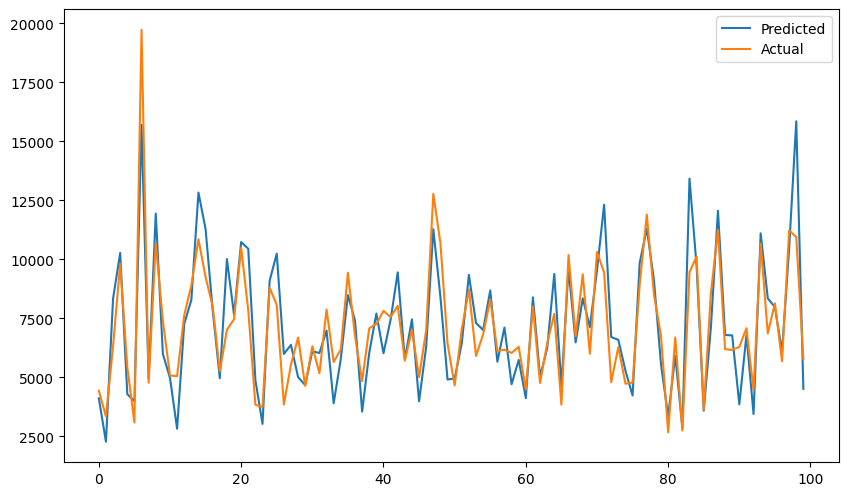

In [97]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred[:100])
plt.legend(["Predicted","Actual"])
plt.show()

We plotted a plot for Predicted Sales values Vs Actual Sales values and we can conclude that there are times when the model cannot predict properly. Hence, we should also look into other models as well to find the best model.

## Decision Tree Regression Model :

In [98]:
# Creating an instance of the DecisionTreeRegressor class and transforming the train and test dataset

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

Here we have created an instance of the DecisionTreeRegressor class and then transformed this data and model a target prediction value based on independent variables in the structure of a tree to produce meaningful continuous output.

In [99]:
# Predicting the values from train dataset

y_pred_train_dt = dt.predict(X_train)

Here we used the DecisionTreeRegressor class to predict values for the independent values that are present in the train set i.e. `X_train`.

In [100]:
y_pred_train_dt

array([ 6019., 12783.,  8675., ...,  1685.,  2614.,  5103.])

These values are the predicted values from the Decision Tree Regression Model for the independent varaibles that are present in the train set.

In [101]:
# Predicting the values from test dataset

y_pred_dt = dt.predict(X_test)

Here we used the DecisionTreeRegressor class to predict values for the independent values that are present in the test set i.e. `X_test`.

In [102]:
y_pred_dt

array([4010., 2026., 8531., ..., 4626., 4767., 4543.])

These values are the predicted values from the Decision Tree Regression Model for the independent varaibles that are present in the test set.

In [129]:
# Checking the metrics for the model

dtrm = model_metrics( 'Decision Tree Regression Model', y_train, y_pred_train_dt, y_test, y_pred_dt)
dtrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Decision Tree Regression Model,0.915721,491.7694,0.000162,0.072224,16.850997,753.929929,0.999971,0.940454,0.999971,0.940453


As we can see in the `dtrm` dataframe that the `r2_score` for the Decision Tree Regression Model is 0.999 for train set and 0.940 for test set. Hence, we can say that this model is excellent because it shows high accuracy.

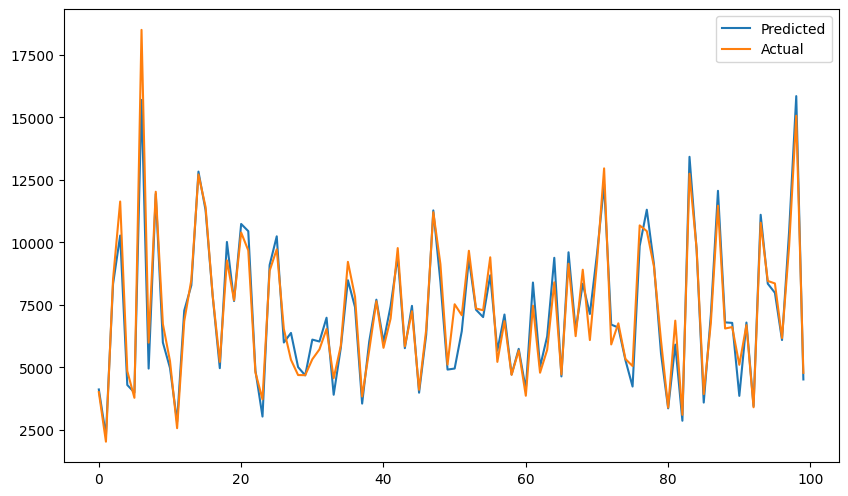

In [104]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred_dt[:100])
plt.legend(["Predicted","Actual"])
plt.show()

We plotted a plot for Predicted Sales values Vs Actual Sales values and we can conclude that this model cannot predict properly as it is overfitting. We get to know this by looking at the accuracy for the train and test dataset. Hence, we should look into other models as well to find the best model.

## Random Forest Regression Model :

In [105]:
# Creating an instance of the RandomForestRegressor class and transforming the train and test dataset

rf = RandomForestRegressor(max_depth=8)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8)

Here we have created an instance of the RandomForestRegressor class and then transformed this data and model a target prediction value based on independent variables using multiple decision tree to produce the output.

In [106]:
# Predicting the values from train dataset

y_pred_train_rf = rf.predict(X_train)

Here we used the RandomForestRegressor class to predict values for the independent values that are present in the train set i.e. `X_train`.

In [107]:
y_pred_train_rf

array([ 6608.69353491, 13409.92211636, 10033.86653986, ...,
        2101.92211716,  3720.8095927 ,  4262.59101196])

These values are the predicted values from the Random Forest Model for the independent varaibles that are present in the train set.

In [108]:
# Predicting the values from test dataset

y_pred_rf = rf.predict(X_test)

Here we used the RandomForestRegressor class to predict values for the independent values that are present in the test set i.e. `X_test`.

In [109]:
y_pred_rf

array([4255.49867189, 2374.77448044, 6515.15888755, ..., 4844.17016394,
       4425.72669409, 4757.110126  ])

These values are the predicted values from the Random Forest Regression Model for the independent varaibles that are present in the test set.

In [130]:
# Checking the metrics for the model

rfrm = model_metrics( 'Random Forest Regression Model', y_train, y_pred_train_rf, y_test, y_pred_rf)
rfrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Random Forest Regression Model,853.309847,855.976189,0.128479,0.129193,1154.636486,1157.214038,0.861925,0.859713,0.861922,0.859711


As we can see in the `rfrm` dataframe that the `r2_score` for the Random Forest Regression Model is 0.861 for train set and 0.859 for test set. Hence, we can say that this model is good because it shows good accuracy.

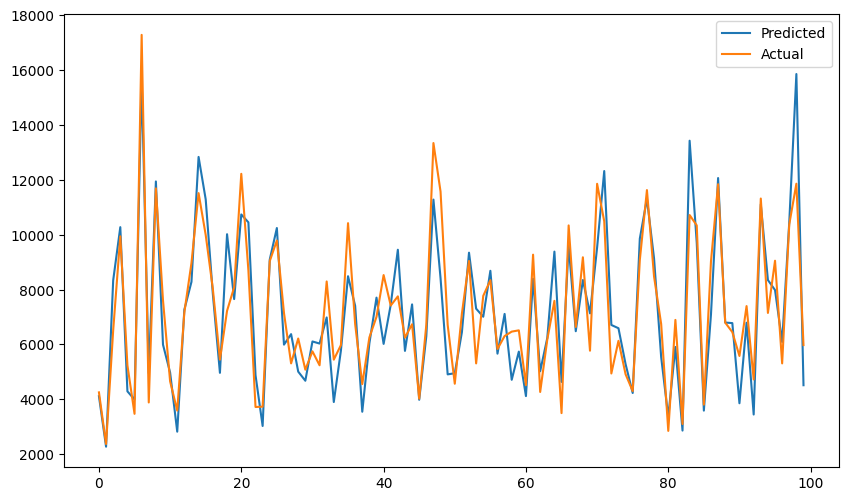

In [111]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred_rf[:100])
plt.legend(["Predicted","Actual"])
plt.show()

We plotted a plot for Predicted Sales values Vs Actual Sales values and we can conclude that this model is good but we should check if we can increase the accuracy for the model. Hence, we should try Hyperparameter Tuning.

## Hyperparameter Tunning

In [112]:
# Creating the dictionary for hyperparameters.

random_grid = {'max_depth': [10, 25, 50], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [20, 40, 60], 'n_estimators': [100, 150, 200]}

We created a dictionary with the hyperparameters that we needed for Hyperparameter Tuning. The Hyperparameters are `max_depth`, `min_samples_leaf`, `min_samples_split` and `n_estimators` because we are Tuning the Random Forest Regression Model.

In [113]:
# Creating an instance of the RandomForestRegressor class, Cross-validation using RandomizedSearchCV and transforming the train and test dataset. 

rf_model = RandomForestRegressor()
rf_reg = RandomizedSearchCV(estimator=rf_model, param_distributions = random_grid, cv = 3, verbose=2)
rf_reg.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=40, n_estimators=200; total time= 5.6min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=40, n_estimators=200; total time= 5.7min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=40, n_estimators=200; total time= 5.5min
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=40, n_estimators=100; total time= 2.8min
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=40, n_estimators=100; total time= 2.8min
[CV] END max_depth=50, min_samples_leaf=4, min_samples_split=40, n_estimators=100; total time= 2.8min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=40, n_estimators=150; total time= 3.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=40, n_estimators=150; total time= 3.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=40, n_estimators=150; total time= 3.5min
[CV] END max_depth=25

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 25, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [20, 40, 60],
                                        'n_estimators': [100, 150, 200]},
                   verbose=2)

Here we have created an instance of the RandomForestRegressor class and then cross-validating the data and then transformed this data and model a target prediction value based on independent variables using the multiple decision trees to produce the output. We gave it a bunch a values to run on and find the best values for the Random Forest Regression Model.

In [114]:
# Inspecting the best parameters.

rf_reg.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 100}

The best parameters for the model are `max_depth` as 25, `min_samples_leaf` as 1, `min_samples_split` as 20 and `n_estimators` as 100.

In [115]:
#Inspecting the best estimators

rf_reg_best = rf_reg.best_estimator_
rf_reg_best

RandomForestRegressor(max_depth=25, min_samples_split=20)

The best estimators for the model are `max_depth` as 25 and `min_samples_split` as 20

In [116]:
# Predicting the values from train dataset

y_pred_train_rf_hpt = rf_reg.predict(X_train)

Here we used the RandomForestRegressor class to predict values for the independent values that are present in the train set i.e. `X_train`.

In [117]:
y_pred_train_rf_hpt

array([ 6328.15086156, 12134.56337371,  9211.63553024, ...,
        1814.95572951,  2789.05166913,  4410.98991251])

These values are the predicted values from the Random Forest Regression Model for the independent varaibles that are present in the train set.

In [118]:
# Predicting the values from test dataset

y_pred_rf_hpt = rf_reg.predict(X_test)

Here we used the RandomForestRegressor class to predict values for the independent values that are present in the test set i.e. `X_test`.

In [119]:
y_pred_rf_hpt

array([4064.04978564, 2001.45561152, 7435.43694125, ..., 4739.44439257,
       4774.38594684, 4723.15868782])

These values are the predicted values from the Random Forest Regression Model for the independent varaibles that are present in the test set.

In [131]:
# Checking the metrics for the model

hptrfrm =  model_metrics( 'Hyperparameter Tunned Random Forest Regression Model', y_train, y_pred_train_rf_hpt, y_test, y_pred_rf_hpt)
hptrfrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Hyperparameter Tunned Random Forest Regression...,311.81435,382.650953,0.045572,0.056013,465.687784,577.882364,0.97754,0.965016,0.977539,0.965015


As we can see in the `htprfrm` dataframe that the `r2_score` for the Random Forest Regression Model is 0.977 for train set and 0.965 for test set. Hence, we can say that this model is excellent as it has high accuracy.

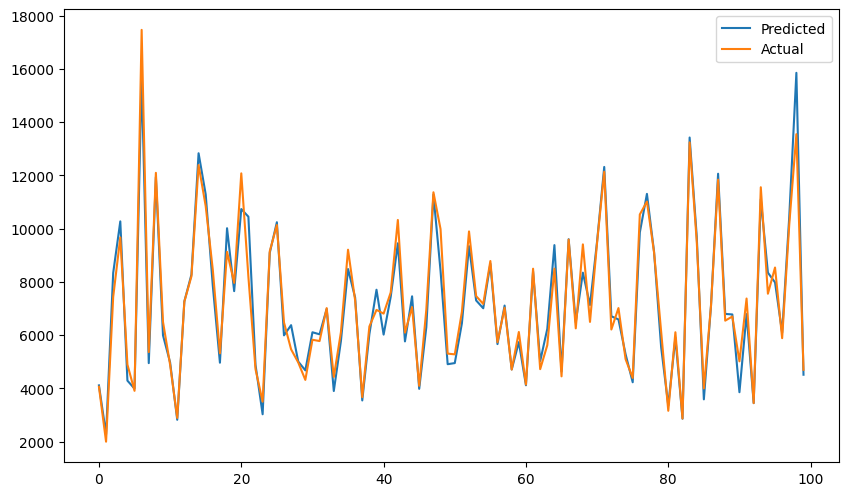

In [121]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred_rf_hpt[:100])
plt.legend(["Predicted","Actual"])
plt.show()

We plotted a plot for Predicted Sales values Vs Actual Sales values and we can conclude that this is the best model as the model shows excellent accuracy.

## Model Metrics Dataset :

In [132]:
# Concatinating all the models metrics in one dataframe

model_metrics_df = pd.concat([lrm,dtrm,rfrm,hptrfrm])

We created a dataframe by using concat() to add `lrm`, `dtrm`, `rfrm` and `htprfrm` together as the final dataframe.

In [133]:
# Inspecting the model metrics dataframe

model_metrics_df

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Linear Regression Model,944.802100,941.918021,0.144110,0.144346,1299.767071,1292.875092,0.825033,0.824893,0.825030,0.824890
0,Decision Tree Regression Model,0.915721,491.769400,0.000162,0.072224,16.850997,753.929929,0.999971,0.940454,0.999971,0.940453
0,Random Forest Regression Model,853.309847,855.976189,0.128479,0.129193,1154.636486,1157.214038,0.861925,0.859713,0.861922,0.859711
0,Hyperparameter Tunned Random Forest Regression...,311.814350,382.650953,0.045572,0.056013,465.687784,577.882364,0.977540,0.965016,0.977539,0.965015


We will use this model to compare the metric values for each Model and get information about the accuracy of the model. We can see that there are two model with excellent accuracy i.e. Decision Tree Regression Model and Hyperparameter Tunned Random Forest Regressor Model but we know that Decision Tree Regression Model is overfitting so it can not be used for prediction therefore our best model is the Hyperparameter Tunned Random Forest Regressor Model.

## Feature Importance :

In [134]:
# Initializing features, importances and indices values

features = X.columns
importances = rf_reg_best.feature_importances_
indices = np.argsort(importances)

We have initialized the Feature Importance parameters so that we can find the important features from all the imput features.

Text(0.5, 0, 'Relative Importance')

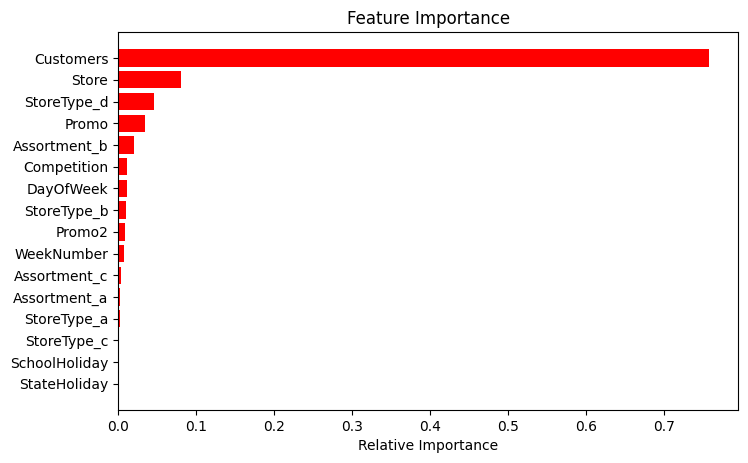

In [135]:
# Plotting feature importance

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Here we tried to find the important features from the given features. The top 5 important features are `Customers`, `Store`, `StoreType_d`, `Promo` and `Assortment_b`.

# Conclusion :

Important points from Exploratory Data Analysis :

* `Sales` column shows positive correlation with `Customers`, `Open` and `Promo` columns.
* `Sales` and `DayOfWeek` shows negative correlation.
* Sales for the Stores increases over the years.
* Sales decrease over weekends.
* Store with closer competition have more sales.
* Stores with all types of assortments tend to have higher sales.
* Sales increases with an increase in customers.
* We can an increase in sales for the stores that did promotion.

Prediction Summary For Models : 

* Linear Regression Model shows an accuracy of 82.5% on train set and 82.4% on test set.
* Decision Tree Regression Model shows an accuracy of 99.9% on train set and 94.0% on test set.
* Random Forest Regression Model shows an accuracy of 86.1% on train set and 85.9% on test set.
* Hyperparameter Tunned Random Forest Regression Model shows an accuracy of 97.7% on train set and 96.5% on test set.
* The best model is the Hyperparameter Tunned Random Forest Regression Model.
* Decision Tree Regression Model has the highest accuracy but since it is overfitting therefore we don't consider this as the best model.

Important Features and Some Suggestions :

* The top five important features are `Customers`, `Store`, `StoreType_d`, `Promo` and `Assortment_b`.
* We can say that if the number of customers increase then there will be an increase in sales so stores should adapt methods for attracting customers.
* It is obvious that with more new stores there will be more sales. 
* Store Owner should open stores that are from the storetype d.
* Now we know that if a store does promotion then the sales will increase so stores should increase their promotions.
* Stores should have assortments of assortment b as this would increase there sales.